
# Análise Estatística das Carnes Distribuídas na Rede Varejista do RN

Este notebook contém a análise estatística para avaliar as hipóteses relacionadas à origem e qualidade das carnes vendidas na rede varejista do Rio Grande do Norte (RN). 
O objetivo é entender as relações entre o porte das lojas e a distância de origem das carnes, a qualidade sanitária e o nível de processamento dos produtos.

## Hipóteses

1. **Varejistas de maior porte vendem carnes que vêm de mais longe.**
   - Variável Independente (VI): Porte do varejista (`porte_loja`)
   - Variável Dependente (VD): Distância da origem (`distancia_km`)
   - Covariável: Renda do setor censitário (`renda_setor`)

2. **Varejistas de maior porte apresentam maior qualidade sanitária.**
   - VI: Porte do varejista (`porte_loja`)
   - VD: Performance sanitária (`desc_desempenho_sanitario`)
   - Covariável: Renda do setor censitário (`renda_setor`)

3. **Varejistas de maior porte vendem mais alimentos ultraprocessados.**
   - VI: Porte do varejista (`porte_loja`)
   - VD: Nível de processamento (`processamento`)
   - Covariável: Renda do setor censitário (`renda_setor`)

## Estrutura do Notebook

Este notebook está dividido nas seguintes seções:
1. **Importação e Configuração Inicial**
2. **Carregamento dos Dados**
3. **Limpeza e Preparação dos Dados**
4. **Análise Exploratória e Estatística**


In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
pd.set_option('display.max_columns', None)  # Configuração para exibir todas as colunas do DataFrame


In [33]:
# Carregamento dos dados
df = pd.read_csv('entrada/20240615_carnestotais_att.csv')
df  # Exibição das primeiras linhas do DataFrame


In [35]:
# Conversão de colunas com números formatados como strings para floats
float_cols = ['lng_loja', 'lat_loja', 'lng_frigo', 'lat_frigo', 'distancia_km', 'renda_setor']
for col in float_cols:
    df[col] = df[col].str.replace(',', '.').astype(float)  # Substitui vírgulas por pontos e converte para float


ID         nome_da_loja  \
0     frango747                 3667   
1       boi1006  Açougue Pai e Filho   
2        boi865  Açougue Pai e Filho   
3        boi866  Açougue Pai e Filho   
4     frango987  Açougue Pai e Filho   
...         ...                  ...   
2331  frango956          Tela Quente   
2332   porco310          Tela Quente   
2333   porco311          Tela Quente   
2334   porco316          Tela Quente   
2335     boi799                Teste   

                                       endereco_da_loja loja_municipio  \
0     RUA GENERINA VALE,809, CENTRO - Rua Joel Damas...          Caico   
1             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
2             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
3             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
4             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
...                                                 ...            ...   
2331  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2332  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2333  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2334  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2335                                              Teste          Outro   

          lng_loja      lat_loja         carne nivel_de_inspecao  \
0       -35,202074     -5,836721        Frango               SIF   
1     -35,34827079  -5,850981514  Carne bovina            SEIPOA   
2     -35,34895744  -5,852689182  Carne bovina               SIF   
3     -3,534930076  -5,851664581  Carne bovina               SIF   
4     -35,34827079  -5,850981514        Frango            SEIPOA   
...            ...           ...           ...               ...   
2331  -35,27215547   -5,77344728        Frango               SIF   
2332  -35,27215547   -5,77344728         suina               SIF   
2333  -35,27215547   -5,77344728         suina               SIF   
2334  -35,27215547   -5,77344728         suina               SIE   
2335      4,619626     50,669363  Carne bovina               SIF   

     num_de_inspecao                        nome_do_frigo  \
0               3667              GUARAVES GUARABIRA AVES   
1               0165                                  NaN   
2                 76                                  JBS   
3               3921  NUTRIZA AGROINDUSTRIAL DE ALIMENTOS   
4               0042                                  NaN   
...              ...                                  ...   
2331             121                                  BRF   
2332            3515                                  BRF   
2333              77                      SEARA ALIMENTOS   
2334             166                                  NaN   
2335           Teste                                  NaN   

                                             frigo_tipo uf_frigo  \
0     AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB   
1                                                   NaN      NaN   
2     UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP   
3                          ABATEDOURO FRIGORIFICO - C15       GO   
4                                                   NaN      NaN   
...                                                 ...      ...   
2331  AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       MG   
2332  AA4 - AVES - ATE 600/H|ABATEDOURO FRIGORIFICO ...       MT   
2333  PC1 - PRODUTOS CARNEOS - MAIS DE 5.000 T/D|UNI...       RS   
2334                                                NaN      NaN   
2335                                                NaN      NaN   

         lng_frigo     lat_frigo  est_desempenho_sanitario  \
0     -35,48996498     -6,852715                       NaN   
1              NaN           NaN                       NaN   
2     -48,56737784  -20,55845552                       4.0   
3     -48,28029255  -17,3005

In [37]:
# Limpeza e ajuste de colunas de texto
df.columns = [i.strip() for i in df.columns]  # Remove espaços extras dos nomes das colunas
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()  # Remove espaços em branco adicionais das entradas de texto


In [39]:
df.columns = [i.strip() for i in df.columns]
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

In [41]:
df.dropna(subset=['lng_frigo'], inplace=True)
df.shape

(2197, 21)

In [43]:
df

ID              nome_da_loja  \
0     frango747                      3667   
2        boi865       Açougue Pai e Filho   
3        boi866       Açougue Pai e Filho   
5          boi3  Ary Coiffure - Carrefour   
6          boi4  Ary Coiffure - Carrefour   
...         ...                       ...   
2329  frango954               Tela Quente   
2330  frango955               Tela Quente   
2331  frango956               Tela Quente   
2332   porco310               Tela Quente   
2333   porco311               Tela Quente   

                                       endereco_da_loja loja_municipio  \
0     RUA GENERINA VALE,809, CENTRO - Rua Joel Damas...          Caico   
2             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
3             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
5     CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
6     CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
...                                                 ...            ...   
2329  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2330  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2331  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2332  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2333  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   

       lng_loja  lat_loja         carne nivel_de_inspecao num_de_inspecao  \
0    -35.202074 -5.836721        Frango               SIF            3667   
2    -35.348957 -5.852689  Carne bovina               SIF              76   
3     -3.534930 -5.851665  Carne bovina               SIF            3921   
5    -35.209900 -5.845500  Carne bovina               SIF             791   
6    -35.209900 -5.845500  Carne bovina               SIF             860   
...         ...       ...           ...               ...             ...   
2329 -35.272155 -5.773447        Frango               SIF             716   
2330 -35.272155 -5.773447        Frango               SIF            3667   
2331 -35.272155 -5.773447        Frango               SIF             121   
2332 -35.272155 -5.773447         suina               SIF            3515   
2333 -35.272155 -5.773447         suina               SIF              77   

                            nome_do_frigo  \
0                 GUARAVES GUARABIRA AVES   
2                                     JBS   
3     NUTRIZA AGROINDUSTRIAL DE ALIMENTOS   
5                                 MINERVA   
6                               MASTERBOI   
...                                   ...   
2329                                  BRF   
2330              GUARAVES GUARABIRA AVES   
2331                                  BRF   
2332                                  BRF   
2333                      SEARA ALIMENTOS   

                                             frigo_tipo uf_frigo  lng_frigo  \
0     AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB -35.489965   
2     UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP -48.567378   
3                          ABATEDOURO FRIGORIFICO - C15       GO -48.280293   
5     ABATEDOURO FRIGORIFICO - C15, AB1 - BOVINO - M...       RO -61.805743   
6     ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO -48.424807   
...                                                 ...      ...        ...   
2329  AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PR -53.741411   
2330  AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB -35.489965   
2331  AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       MG -48.277950   
2332  AA4 - AVES - ATE 600/H|ABATEDOURO FRIGORIFICO ...       MT -55.921771   
2333  PC1 - PRODUTOS CARNEOS - MAIS DE 5.000 T/D|UNI...       RS -51.943847   

      lat_frigo  est_desempenho_sanitario  \
0     -6.852715                       NaN   
2    -20.558456                       4.0   
3    -17.300581                  

In [45]:
df.to_csv('saida/20240615_carnestotais_att_nonans.csv', index=False)

# Descritiva
## De onde vêm as carnes distribuídas na rede varejista do RN?

In [48]:
df.uf_frigo.value_counts()

uf_frigo
SC    325
PR    322
SP    219
GO    185
MT    173
MS    153
PA    149
RS    148
MG    147
PE    117
PB     69
TO     63
RJ     26
CE     22
RO     21
BA     20
MA     20
DF     11
ES      3
AC      2
RR      1
SE      1
Name: count, dtype: int64

/var/folders/bp/64w2_y254b14x57_vbv1x62r0000gn/T/ipykernel_77352/1766326036.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(estados.centroid.x, estados.centroid.y, (estados['freq'].astype(int))):


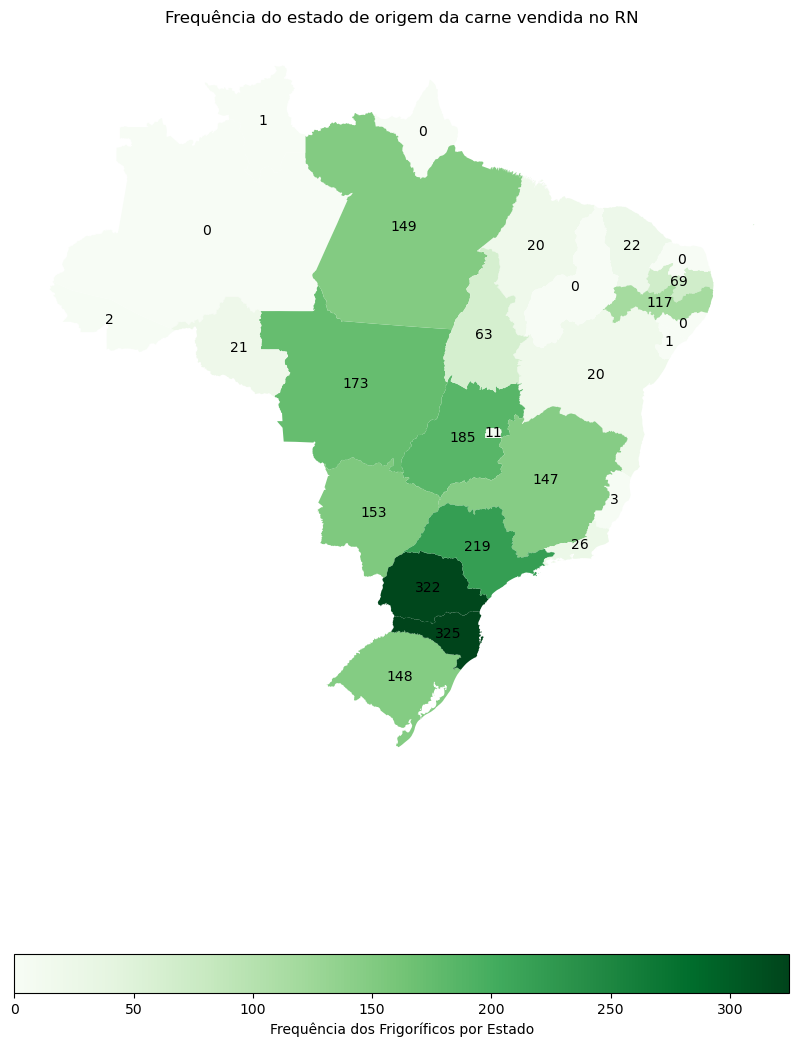

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt

# URL to the GeoJSON file of Brazilian states
geojson_url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'

# Load the GeoJSON file
estados = gpd.read_file(geojson_url)

# Map the frequency of states in 'uf_frigo' column to the states GeoDataFrame
estado_frequencia = df['uf_frigo'].value_counts()
estados['freq'] = estados['sigla'].map(estado_frequencia).fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
estados.plot(column='freq', ax=ax, legend=True, cmap='Greens',
             legend_kwds={'label': "Frequência dos Frigoríficos por Estado",
                          'orientation': "horizontal"})
plt.title('Frequência do estado de origem da carne vendida no RN')

# add the number of frigoríficos in each state
for x, y, label in zip(estados.centroid.x, estados.centroid.y, (estados['freq'].astype(int))):
    ax.text(x, y, label, color='black', fontsize=10, ha='center', va='center')
plt.axis('off')
plt.savefig('carne_total.png', dpi=300)
plt.show()


In [51]:
df.carne.value_counts().index

Index(['Carne bovina', 'Frango', 'suina'], dtype='object', name='carne')

/var/folders/bp/64w2_y254b14x57_vbv1x62r0000gn/T/ipykernel_77352/3900327023.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(estados.centroid.x, estados.centroid.y, (estados['freq'].astype(int))):


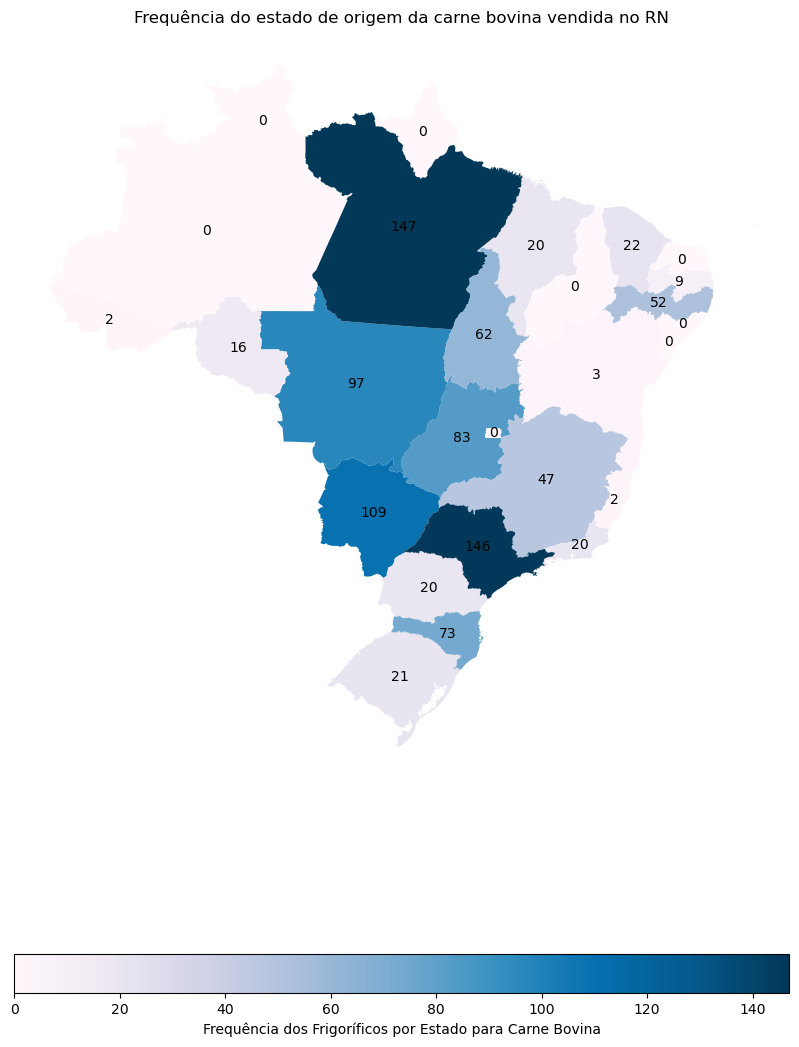

In [52]:
# Load the GeoJSON file
estados = gpd.read_file(geojson_url)

# Map the frequency of states in 'uf_frigo' column to the states GeoDataFrame
df_tmp = df[df.carne == 'Carne bovina']
estado_frequencia = df_tmp['uf_frigo'].value_counts()
estados['freq'] = estados['sigla'].map(estado_frequencia).fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
estados.plot(column='freq', ax=ax, legend=True, cmap='PuBu',
             legend_kwds={'label': "Frequência dos Frigoríficos por Estado para Carne Bovina",
                          'orientation': "horizontal"})
plt.title('Frequência do estado de origem da carne bovina vendida no RN')

# add the number of frigoríficos in each state
for x, y, label in zip(estados.centroid.x, estados.centroid.y, (estados['freq'].astype(int))):
    ax.text(x, y, label, color='black', fontsize=10, ha='center', va='center')
plt.axis('off')
plt.savefig('bovina.png', dpi=300)
plt.show()


/var/folders/bp/64w2_y254b14x57_vbv1x62r0000gn/T/ipykernel_77352/2140885158.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(estados.centroid.x, estados.centroid.y, (estados['freq'].astype(int))):


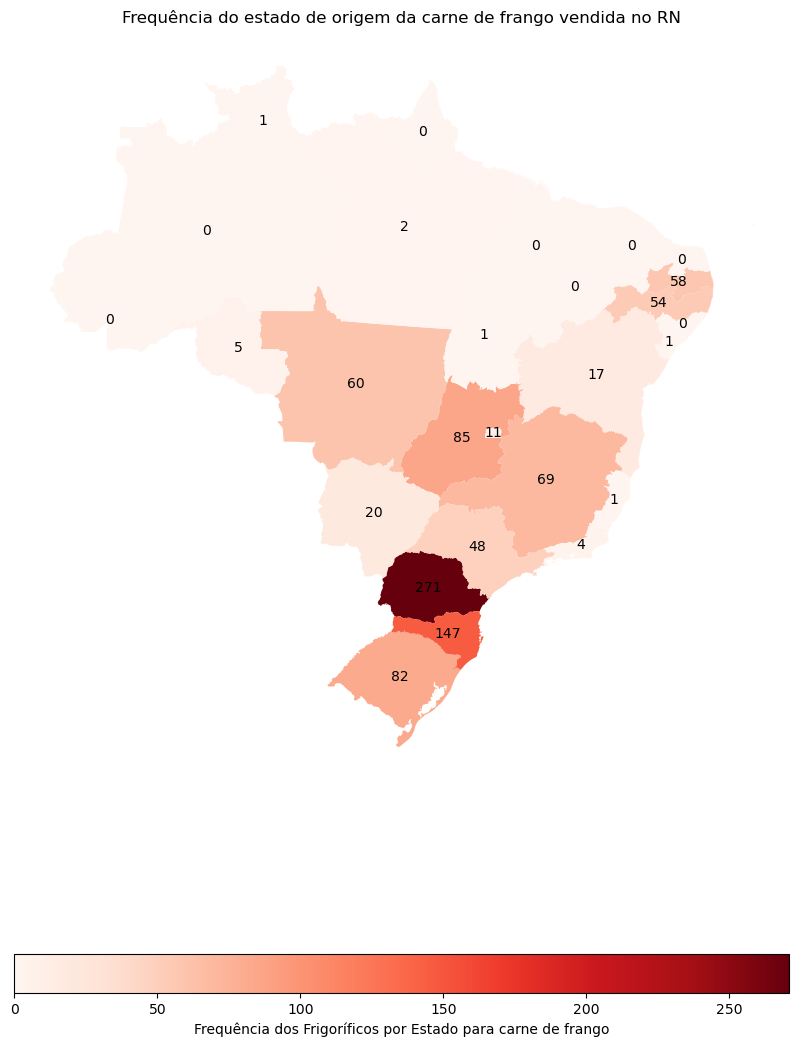

In [53]:
# Load the GeoJSON file
estados = gpd.read_file(geojson_url)

# Map the frequency of states in 'uf_frigo' column to the states GeoDataFrame
df_tmp = df[df.carne == 'Frango']
estado_frequencia = df_tmp['uf_frigo'].value_counts()
estados['freq'] = estados['sigla'].map(estado_frequencia).fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
estados.plot(column='freq', ax=ax, legend=True, cmap='Reds',#'OrRd',
             legend_kwds={'label': "Frequência dos Frigoríficos por Estado para carne de frango",
                          'orientation': "horizontal"})
plt.title('Frequência do estado de origem da carne de frango vendida no RN')

# add the number of frigoríficos in each state
for x, y, label in zip(estados.centroid.x, estados.centroid.y, (estados['freq'].astype(int))):
    ax.text(x, y, label, color='black', fontsize=10, ha='center', va='center')
plt.axis('off')
plt.savefig('frango.png', dpi=300)
plt.show()


/var/folders/bp/64w2_y254b14x57_vbv1x62r0000gn/T/ipykernel_77352/4199070095.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(estados.centroid.x, estados.centroid.y, (estados['freq'].astype(int))):


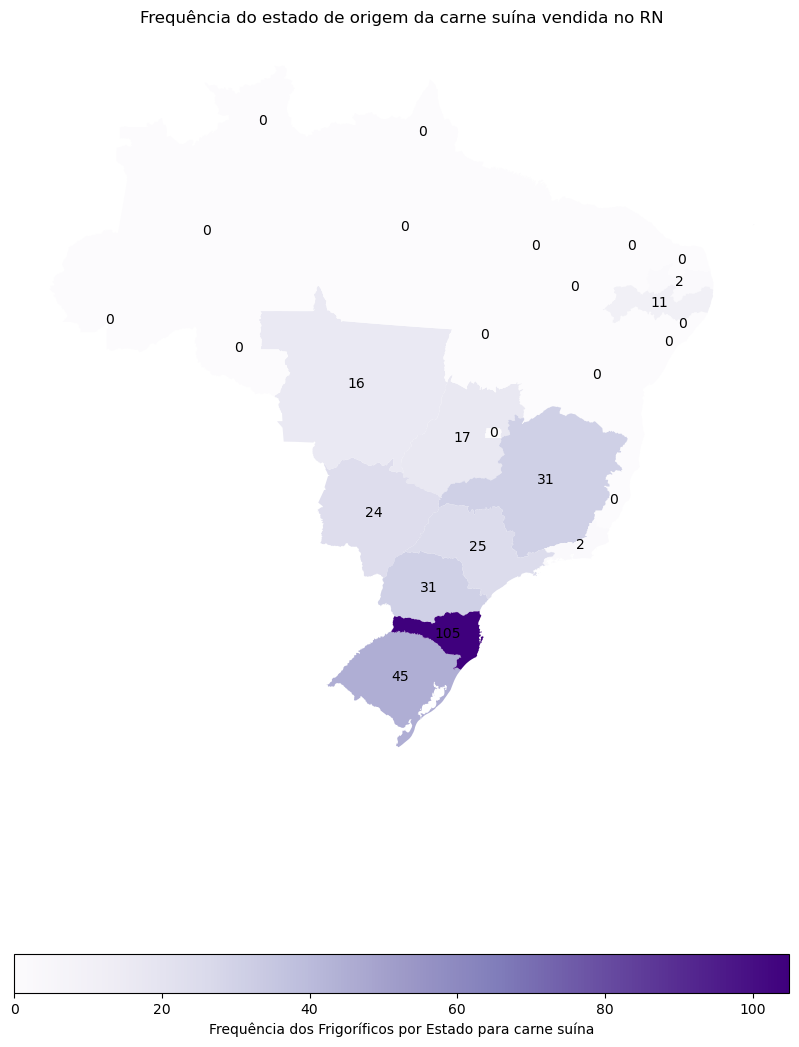

In [54]:
# Load the GeoJSON file
estados = gpd.read_file(geojson_url)

# Map the frequency of states in 'uf_frigo' column to the states GeoDataFrame
df_tmp = df[df.carne == 'suina']
estado_frequencia = df_tmp['uf_frigo'].value_counts()
estados['freq'] = estados['sigla'].map(estado_frequencia).fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
estados.plot(column='freq', ax=ax, legend=True, cmap='Purples',
             legend_kwds={'label': "Frequência dos Frigoríficos por Estado para carne suína",
                          'orientation': "horizontal"})
plt.title('Frequência do estado de origem da carne suína vendida no RN')

# add the number of frigoríficos in each state
for x, y, label in zip(estados.centroid.x, estados.centroid.y, (estados['freq'].astype(int))):
    ax.text(x, y, label, color='black', fontsize=10, ha='center', va='center')
plt.axis('off')
plt.savefig('suina.png', dpi=300)
plt.show()


In [55]:
estados

id                 name sigla regiao_id codigo_ibg  cartodb_id  \
0    1                 Acre    AC         3         12           1   
1    2              Alagoas    AL         4         27           2   
2    3             Amazonas    AM         3         13           3   
3    4                Amapá    AP         3         16           4   
4    5                Bahia    BA         4         29           5   
5    6                Ceará    CE         4         23           6   
6    8       Espírito Santo    ES         2         32           8   
7    9                Goiás    GO         5         52           9   
8   10             Maranhão    MA         4         21          10   
9   11         Minas Gerais    MG         2         31          11   
10  12   Mato Grosso do Sul    MS         5         50          12   
11  13          Mato Grosso    MT         5         51          13   
12  14                 Pará    PA         3         15          14   
13  15              Paraíba    PB         4         25          15   
14  16           Pernambuco    PE         4         26          16   
15  17                Piauí    PI         4         22          17   
16  18               Paraná    PR         1         41          18   
17  19       Rio de Janeiro    RJ         2         33          19   
18  20  Rio Grande do Norte    RN         4         24          20   
19  21             Rondônia    RO         3         11          21   
20  22              Roraima    RR         3         14          22   
21  23    Rio Grande do Sul    RS         1         43          23   
22  24       Santa Catarina    SC         1         42          24   
23  25              Sergipe    SE         4         28          25   
24  26            São Paulo    SP         2         35          26   
25  27            Tocantins    TO         3         17          27   
26   7     Distrito Federal    DF         5         53           7   

                  created_at                updated_at  \
0  2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
1  2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
2  2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
3  2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
4  2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
5  2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
6  2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
7  2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
8  2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
9  2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
10 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
11 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
12 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
13 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
14 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
15 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
16 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
17 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
18 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
19 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
20 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
21 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
22 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
23 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
24 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
25 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   
26 2015-02-09 16:46:01+00:00 2015-02-09 16:46:01+00:00   

                                             geometry   freq  
0   MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ...    0.0  
1   MULTIPOLYGON (((-35.46516 -8.82549, -35.46626 ...    0.0  
2   MULTIPOLYGON (((-67.32553 2.03012, -67.32234 2...    0.0  
3   MULTIPOLYGON (((-51.18168 4.00889, -51.17900 3...    0.0  
4   MULTIPOLYGON (((-39.28820 -8.56290, -39.28229 ...    0.0  
5   MULTIPOLYGON (((-40.01804 -2.83698, 

# Hipóteses e variáveis 
## Hipótese  1  - Varejistas de maior porte vendem carnes que vêm de mais longe

- VI - Porte do varejista, porte_loja
- VD - Distância da origem, distancia_km (todos)
- Covariável - Renda setor censitário, renda_setor 

In [59]:
df.reset_index(drop=True, inplace=True)

In [60]:
# Verifica se há algum valor NaN
print(df.isnull().any())

ID                           False
nome_da_loja                 False
endereco_da_loja             False
loja_municipio               False
lng_loja                     False
lat_loja                     False
carne                        False
nivel_de_inspecao             True
num_de_inspecao              False
nome_do_frigo                False
frigo_tipo                   False
uf_frigo                     False
lng_frigo                    False
lat_frigo                    False
est_desempenho_sanitario      True
desc_desempenho_sanitario     True
distancia_km                 False
cod_setor                     True
renda_setor                   True
porte_loja                   False
processamento                 True
dtype: bool


In [61]:
df.dropna(subset=['renda_setor'], inplace=True) # Remover linhas com valores NaN


In [63]:
df['porte_loja'] = df['porte_loja'].astype('category')

In [64]:
df.shape

(2194, 21)

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


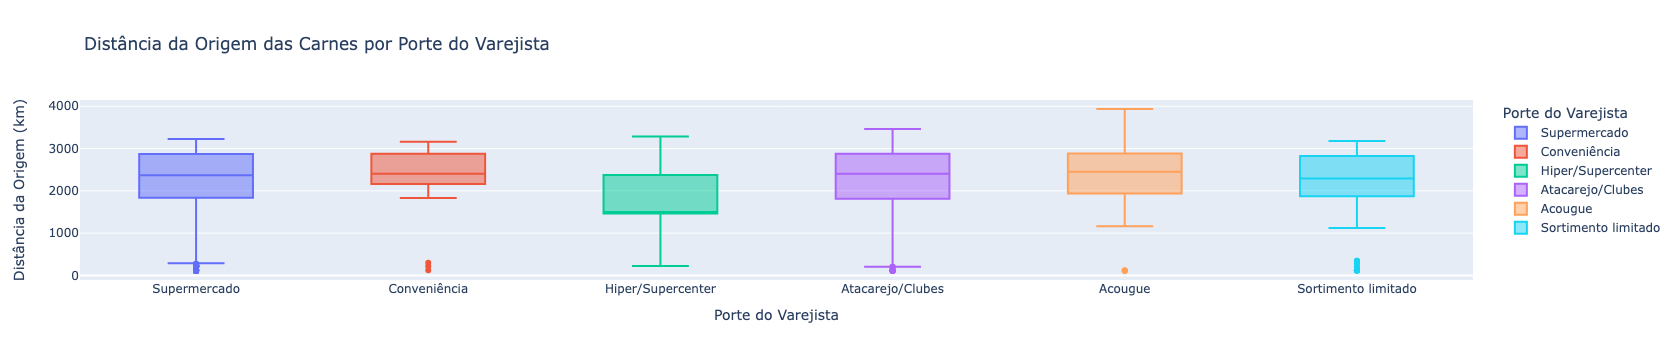

In [66]:
import plotly.express as px

# Análise Exploratória com Plotly
fig = px.box(df, x='porte_loja', y='distancia_km', 
             title='Distância da Origem das Carnes por Porte do Varejista',
             labels={'porte_loja': 'Porte do Varejista', 'distancia_km': 'Distância da Origem (km)'},
                color='porte_loja')

fig.write_html('hipotese1.html')
fig.show()


/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



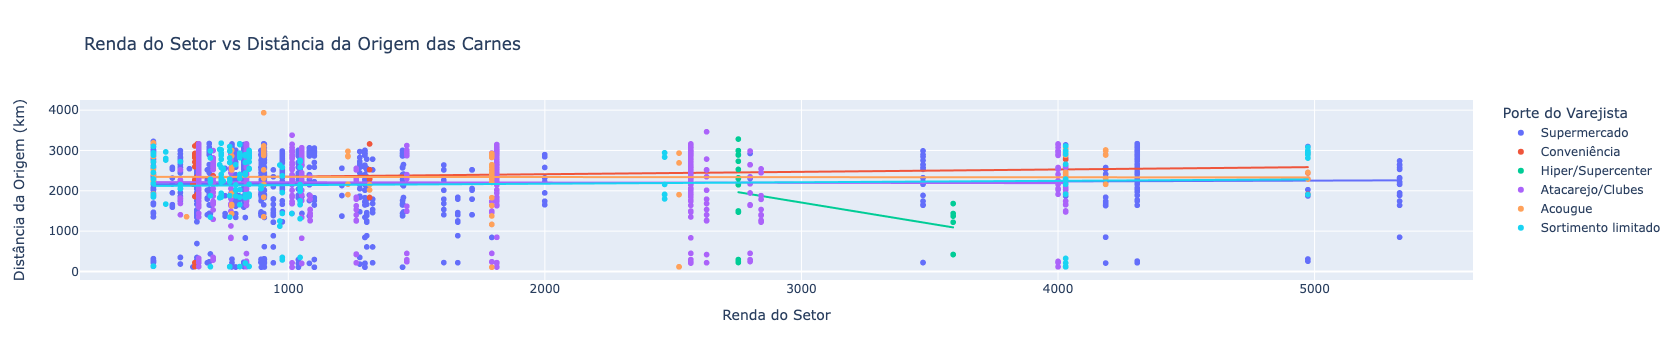

In [67]:
fig = px.scatter(df, x='renda_setor', y='distancia_km', color='porte_loja',
                 title='Renda do Setor vs Distância da Origem das Carnes',
                 labels={'renda_setor': 'Renda do Setor', 'distancia_km': 'Distância da Origem (km)', 'porte_loja': 'Porte do Varejista'},
                trendline='ols')
fig.write_html('hipotese1_acessorio_renda.html')

fig.show()

In [75]:
df.groupby('porte_loja')['distancia_km'].describe()

/var/folders/bp/64w2_y254b14x57_vbv1x62r0000gn/T/ipykernel_77352/2386781274.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



count         mean         std         min          25%  \
porte_loja                                                                      
Acougue                82.0  2341.079965  724.201536  105.203464  1956.444463   
Atacarejo/Clubes      648.0  2207.263716  822.945185  105.198464  1814.848867   
Conveniência           63.0  2395.368906  627.459037  122.138121  2163.463053   
Hiper/Supercenter      33.0  1806.469437  866.454392  221.862241  1474.096078   
Sortimento limitado   154.0  2151.295937  844.850630  116.985861  1873.426730   
Supermercado         1214.0  2178.201472  823.719203  104.529478  1837.243068   

                             50%          75%          max  
porte_loja                                                  
Acougue              2450.738408  2882.849757  3935.429160  
Atacarejo/Clubes     2407.202108  2880.136952  3463.317935  
Conveniência         2406.571699  2875.587967  3163.111249  
Hiper/Supercenter    1499.184873  2320.238921  3282.762795  
Sortimento limitado  2289.670349  2819.573841  3181.309642  
Supermercado         2370.859683  2872.694998  3225.057481

In [76]:
#Pressuposto 1 da ANCOVA: Existe independência da VI sobre a covariável? Ou seja, não posso ter rendas médias muito diferentes associadas aos diferentes portes de lojas

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [78]:
modelo_pressuposto1 = ols('renda_setor ~ C(porte_loja)', data=df).fit()

print(modelo_pressuposto1.summary())

                            OLS Regression Results                            
Dep. Variable:            renda_setor   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     25.66
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           3.05e-25
Time:                        15:28:17   Log-Likelihood:                -18538.
No. Observations:                2194   AIC:                         3.709e+04
Df Residuals:                    2188   BIC:                         3.712e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [79]:
#Resultado - Não há independência entre a covariável renda e a variável independente. Não posso fazer ANCOVA

In [81]:
# Passo 1: Converta a variável categórica 'porte_loja' em variáveis dummy
df = pd.get_dummies(df, columns=['porte_loja'], drop_first=True)

In [82]:
dummy_columns = [col for col in df.columns if 'porte_loja_' in col]

In [83]:
independent_vars = dummy_columns + ['renda_setor']

In [84]:
X = df[independent_vars]

In [85]:
y = df['distancia_km']

In [86]:
print(X.dtypes)

porte_loja_Atacarejo/Clubes          bool
porte_loja_Conveniência              bool
porte_loja_Hiper/Supercenter         bool
porte_loja_Sortimento limitado       bool
porte_loja_Supermercado              bool
renda_setor                       float64
dtype: object


In [91]:
print(y.dtype)

float64


In [94]:
X = X.astype(int)

In [98]:
# Adicione uma constante ao modelo para incluir o intercepto
X = sm.add_constant(X)

In [100]:
# Passo 3: Ajuste o modelo GLM
# Aqui, utilizamos a família Gaussian pois estamos lidando com uma variável resposta contínua
modelo_glm = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

In [102]:
print(modelo_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           distancia_km   No. Observations:                 2194
Model:                            GLM   Df Residuals:                     2187
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                      6.6792e+05
Method:                          IRLS   Log-Likelihood:                -17823.
Date:                Tue, 02 Jul 2024   Deviance:                   1.4607e+09
Time:                        15:28:23   Pearson chi2:                 1.46e+09
No. Iterations:                     3   Pseudo R-squ. (CS):           0.007184
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [104]:
import numpy as np
import statsmodels.api as sm
from scipy import stats

In [108]:
# Obter os resíduos
residuos = modelo_glm.resid_response

# Testar a normalidade dos resíduos usando o teste de Shapiro-Wilk
statistic, p_value = stats.shapiro(residuos)

print(f'Estatística de teste: {statistic}, P-valor: {p_value}')

# Interpretando o resultado
if p_value > 0.05:
    print("Os resíduos parecem vir de uma distribuição normalmente distribuída (não rejeita H0)")
else:
    print("Os resíduos não parecem vir de uma distribuição normalmente distribuída (rejeita H0)")

Estatística de teste: 0.8706440329551697, P-valor: 2.7467944212032913e-39
Os resíduos não parecem vir de uma distribuição normalmente distribuída (rejeita H0)


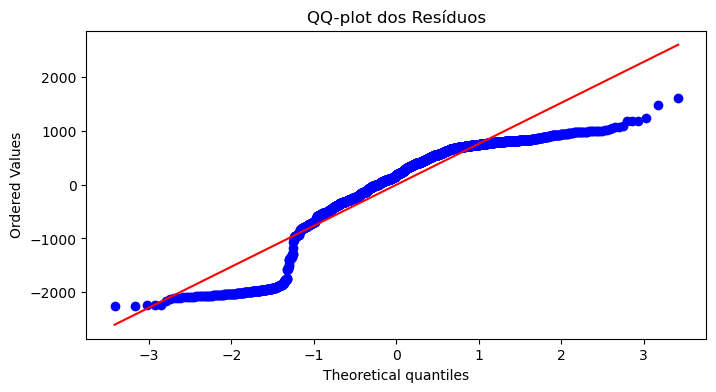

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



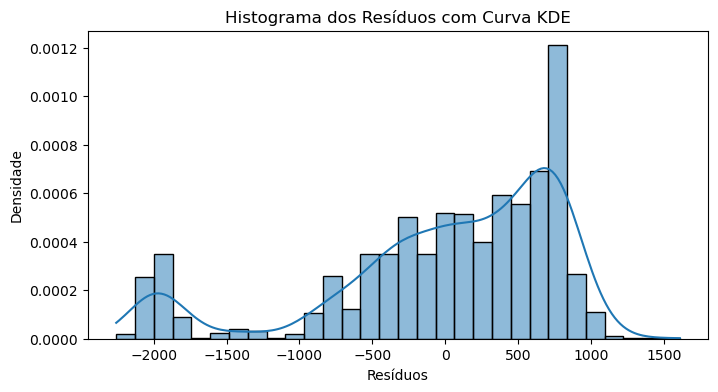

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ-plot dos resíduos
plt.figure(figsize=(8, 4))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('QQ-plot dos Resíduos')
plt.savefig('residuos_hip1.png', dpi=300, bbox_inches='tight')
plt.show()

# Histograma dos resíduos com KDE (Kernel Density Estimate)
plt.figure(figsize=(8, 4))
sns.histplot(residuos, kde=True, bins=30, stat='density')
plt.title('Histograma dos Resíduos com Curva KDE')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()


In [111]:
y_transformed = np.log(y)
modelo_glm_transformado = sm.GLM(y_transformed, X, family=sm.families.Gaussian()).fit()
print(modelo_glm_transformado.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           distancia_km   No. Observations:                 2194
Model:                            GLM   Df Residuals:                     2187
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                         0.58560
Method:                          IRLS   Log-Likelihood:                -2522.6
Date:                Tue, 02 Jul 2024   Deviance:                       1280.7
Time:                        15:28:27   Pearson chi2:                 1.28e+03
No. Iterations:                     3   Pseudo R-squ. (CS):           0.004609
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

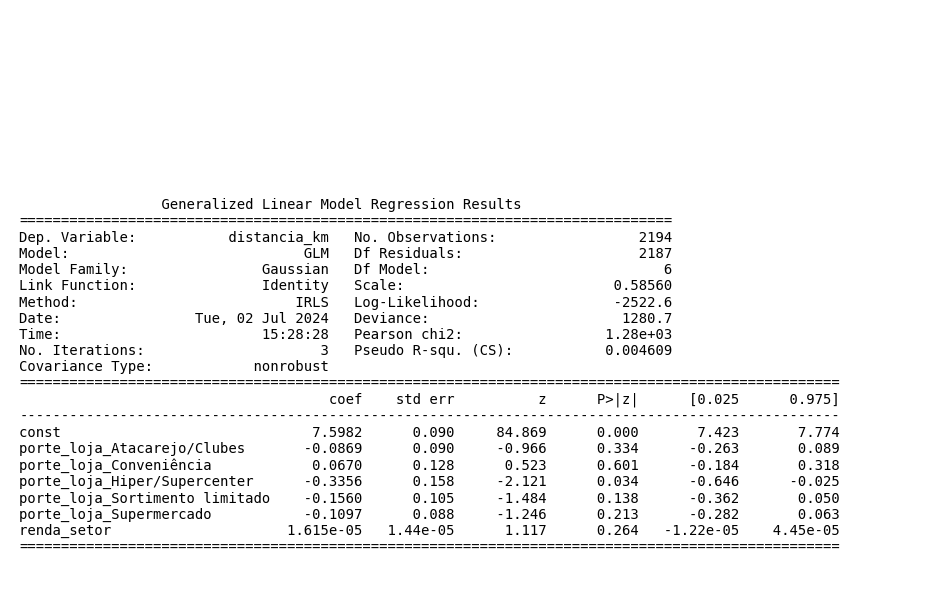

In [115]:
import matplotlib.pyplot as plt

# Primeiro, converta o resumo do modelo em uma string
summary_str = modelo_glm_transformado.summary().as_text()

# Em seguida, use matplotlib para criar uma imagem de texto
plt.figure(figsize=(10, 6))  # Ajuste o tamanho conforme necessário
plt.text(0.01, 0.05, summary_str, {'fontsize': 10}, fontname='Monospace')  # Ajuste a posição e o tamanho do texto conforme necessário
plt.axis('off')
plt.tight_layout()

# Salvar a imagem
plt.savefig('modelo_glm_transformado_summary.png', dpi=300, bbox_inches='tight')


>  Os resultados indicam que os varejistas do tipo "Hiper/Supercenter" obtêm carnes de distâncias significativamente menores em comparação com outros tipos de varejistas, especificamente "Atacarejo/Clubes" e "Supermercado". Esses resultados não suportam a hipótese de que varejistas de maior porte vendem carnes que vêm de mais longe. Na verdade, o contrário parece ser verdadeiro para os "Hiper/Supercenter".


## Hipótese 2  - Varejista de maior porte maior a qualidade sanitária 
- VI - Porte do varejista, porte_loja
- VD - Performance sanitária, desc_desempenho_sanitario (apenas boi) 
- Covariável - Renda setor censitário, renda_setor 

In [119]:
df = pd.read_csv('entrada/20240615_carnestotais_att.csv')


In [120]:
# Filtrar dados para apenas "Carne bovina"
carne_bovina_data = df[df['carne'] == 'Carne bovina']

In [121]:
carne_bovina_data

ID              nome_da_loja  \
1     boi1006       Açougue Pai e Filho   
2      boi865       Açougue Pai e Filho   
3      boi866       Açougue Pai e Filho   
5        boi3  Ary Coiffure - Carrefour   
6        boi4  Ary Coiffure - Carrefour   
...       ...                       ...   
2323   boi966               Tela Quente   
2324   boi967               Tela Quente   
2325   boi968               Tela Quente   
2326   boi969               Tela Quente   
2335   boi799                     Teste   

                                       endereco_da_loja loja_municipio  \
1             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
2             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
3             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
5     CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
6     CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
...                                                 ...            ...   
2323  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2324  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2325  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2326  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2335                                              Teste          Outro   

          lng_loja      lat_loja         carne nivel_de_inspecao  \
1     -35,34827079  -5,850981514  Carne bovina            SEIPOA   
2     -35,34895744  -5,852689182  Carne bovina               SIF   
3     -3,534930076  -5,851664581  Carne bovina               SIF   
5         -35,2099       -5,8455  Carne bovina               SIF   
6         -35,2099       -5,8455  Carne bovina               SIF   
...            ...           ...           ...               ...   
2323  -35,27215547   -5,77344728  Carne bovina               SIF   
2324  -35,27215547   -5,77344728  Carne bovina               SIF   
2325  -35,27215547   -5,77344728  Carne bovina               SIF   
2326  -35,27215547   -5,77344728  Carne bovina               SIF   
2335      4,619626     50,669363  Carne bovina               SIF   

     num_de_inspecao                                      nome_do_frigo  \
1               0165                                                NaN   
2                 76                                                JBS   
3               3921                NUTRIZA AGROINDUSTRIAL DE ALIMENTOS   
5                791                                            MINERVA   
6                860                                          MASTERBOI   
...              ...                                                ...   
2323              65  BRASA BURGER INDUSTRIA E COMERCIO DE DERIVADOS...   
2324            2478             GRANJA BRASILIA AGROINDUSTRIAL AVICOLA   
2325              93  COOPERATIVA DOS PRODUTORES DE CARNE E DERIVADO...   
2326              51                                                JBS   
2335           Teste                                                NaN   

                                             frigo_tipo uf_frigo  \
1                                                   NaN      NaN   
2     UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP   
3                          ABATEDOURO FRIGORIFICO - C15       GO   
5     ABATEDOURO FRIGORIFICO - C15, AB1 - BOVINO - M...       RO   
6     ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO   
...                                                 ...      ...   
2323  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP   
2324  ABATEDOURO FRIGORIFICO - C15, ENTREPOSTO DE PR...       MG   
2325  ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO   
2326  ABATEDOURO FRIGORIFICO - C15, AB2 - BOVINO - M...       MT   
2335                                                NaN      NaN   

         lng_frigo     lat_frigo  est_desempenho_sanitario  \
1       

In [124]:
# Converter a coluna 'renda_setor' para string
carne_bovina_data['renda_setor'] = carne_bovina_data['renda_setor'].astype(str)

# Substituir vírgula por ponto e converter para float
carne_bovina_data['renda_setor'] = carne_bovina_data['renda_setor'].str.replace(',', '.').astype(float)

/var/folders/bp/64w2_y254b14x57_vbv1x62r0000gn/T/ipykernel_77352/3552327796.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bp/64w2_y254b14x57_vbv1x62r0000gn/T/ipykernel_77352/3552327796.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
carne_bovina_data

ID              nome_da_loja  \
1     boi1006       Açougue Pai e Filho   
2      boi865       Açougue Pai e Filho   
3      boi866       Açougue Pai e Filho   
5        boi3  Ary Coiffure - Carrefour   
6        boi4  Ary Coiffure - Carrefour   
...       ...                       ...   
2323   boi966               Tela Quente   
2324   boi967               Tela Quente   
2325   boi968               Tela Quente   
2326   boi969               Tela Quente   
2335   boi799                     Teste   

                                       endereco_da_loja loja_municipio  \
1             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
2             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
3             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
5     CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
6     CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
...                                                 ...            ...   
2323  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2324  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2325  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2326  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2335                                              Teste          Outro   

          lng_loja      lat_loja         carne nivel_de_inspecao  \
1     -35,34827079  -5,850981514  Carne bovina            SEIPOA   
2     -35,34895744  -5,852689182  Carne bovina               SIF   
3     -3,534930076  -5,851664581  Carne bovina               SIF   
5         -35,2099       -5,8455  Carne bovina               SIF   
6         -35,2099       -5,8455  Carne bovina               SIF   
...            ...           ...           ...               ...   
2323  -35,27215547   -5,77344728  Carne bovina               SIF   
2324  -35,27215547   -5,77344728  Carne bovina               SIF   
2325  -35,27215547   -5,77344728  Carne bovina               SIF   
2326  -35,27215547   -5,77344728  Carne bovina               SIF   
2335      4,619626     50,669363  Carne bovina               SIF   

     num_de_inspecao                                      nome_do_frigo  \
1               0165                                                NaN   
2                 76                                                JBS   
3               3921                NUTRIZA AGROINDUSTRIAL DE ALIMENTOS   
5                791                                            MINERVA   
6                860                                          MASTERBOI   
...              ...                                                ...   
2323              65  BRASA BURGER INDUSTRIA E COMERCIO DE DERIVADOS...   
2324            2478             GRANJA BRASILIA AGROINDUSTRIAL AVICOLA   
2325              93  COOPERATIVA DOS PRODUTORES DE CARNE E DERIVADO...   
2326              51                                                JBS   
2335           Teste                                                NaN   

                                             frigo_tipo uf_frigo  \
1                                                   NaN      NaN   
2     UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP   
3                          ABATEDOURO FRIGORIFICO - C15       GO   
5     ABATEDOURO FRIGORIFICO - C15, AB1 - BOVINO - M...       RO   
6     ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO   
...                                                 ...      ...   
2323  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP   
2324  ABATEDOURO FRIGORIFICO - C15, ENTREPOSTO DE PR...       MG   
2325  ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO   
2326  ABATEDOURO FRIGORIFICO - C15, AB2 - BOVINO - M...       MT   
2335                                                NaN      NaN   

         lng_frigo     lat_frigo  est_desempenho_sanitario  \
1       

In [129]:
print(carne_bovina_data.dtypes)

ID                            object
nome_da_loja                  object
endereco_da_loja              object
loja_municipio                object
lng_loja                      object
lat_loja                      object
carne                         object
nivel_de_inspecao             object
num_de_inspecao               object
nome_do_frigo                 object
frigo_tipo                    object
uf_frigo                      object
lng_frigo                     object
lat_frigo                     object
est_desempenho_sanitario     float64
desc_desempenho_sanitario     object
distancia_km                  object
cod_setor                    float64
renda_setor                  float64
porte_loja                    object
processamento                 object
dtype: object


In [131]:
#Remover NANs
colunas_verificar = ['est_desempenho_sanitario', 'porte_loja', 'renda_setor']
carne_bovina_data_clean = carne_bovina_data.dropna(subset=colunas_verificar)
carne_bovina_data_clean

ID                  nome_da_loja  \
2     boi865           Açougue Pai e Filho   
5       boi3      Ary Coiffure - Carrefour   
6       boi4      Ary Coiffure - Carrefour   
7       boi5      Ary Coiffure - Carrefour   
12     boi32              Assaí Atacadista   
...      ...                           ...   
2191  boi778  SUPERMERCADO TODO DIA MATRIZ   
2323  boi966                   Tela Quente   
2324  boi967                   Tela Quente   
2325  boi968                   Tela Quente   
2326  boi969                   Tela Quente   

                                       endereco_da_loja loja_municipio  \
2             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
5     CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
6     CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
7     CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
12    AV. DÃO SILVEIRA, S/N - PITIMBÚ, NATAL - RN, 5...          Natal   
...                                                 ...            ...   
2191                             RUA JOAQUIM DE GOIS,32       Extremoz   
2323  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2324  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2325  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2326  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   

          lng_loja      lat_loja         carne nivel_de_inspecao  \
2     -35,34895744  -5,852689182  Carne bovina               SIF   
5         -35,2099       -5,8455  Carne bovina               SIF   
6         -35,2099       -5,8455  Carne bovina               SIF   
7         -35,2099       -5,8455  Carne bovina               SIF   
12        -35,2211       -5,8703  Carne bovina               SIF   
...            ...           ...           ...               ...   
2191    -35,289732     -5,687432  Carne bovina               SIF   
2323  -35,27215547   -5,77344728  Carne bovina               SIF   
2324  -35,27215547   -5,77344728  Carne bovina               SIF   
2325  -35,27215547   -5,77344728  Carne bovina               SIF   
2326  -35,27215547   -5,77344728  Carne bovina               SIF   

     num_de_inspecao                                      nome_do_frigo  \
2                 76                                                JBS   
5                791                                            MINERVA   
6                860                                          MASTERBOI   
7                860                                          MASTERBOI   
12              3548               COOPERATIVA CENTRAL AURORA ALIMENTOS   
...              ...                                                ...   
2191             490                                    SEARA ALIMENTOS   
2323              65  BRASA BURGER INDUSTRIA E COMERCIO DE DERIVADOS...   
2324            2478             GRANJA BRASILIA AGROINDUSTRIAL AVICOLA   
2325              93  COOPERATIVA DOS PRODUTORES DE CARNE E DERIVADO...   
2326              51                                                JBS   

                                             frigo_tipo uf_frigo  \
2     UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP   
5     ABATEDOURO FRIGORIFICO - C15, AB1 - BOVINO - M...       RO   
6     ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO   
7     ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO   
12                         ABATEDOURO FRIGORIFICO - C15       SC   
...                                                 ...      ...   
2191                       ABATEDOURO FRIGORIFICO - C15       SC   
2323  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP   
2324  ABATEDOURO FRIGORIFICO - C15, ENTREPOSTO DE PR...       MG   
2325  ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO   
2326  ABATEDOURO FRIGORIFICO - C15, AB2 - BOVINO - M...       MT   

         lng_frigo     lat_frigo 

In [133]:
# Garantir que a performance sanitária seja numérica
carne_bovina_data_clean['est_desempenho_sanitario'] = pd.to_numeric(carne_bovina_data_clean['est_desempenho_sanitario'], errors='coerce')
carne_bovina_data_clean

/var/folders/bp/64w2_y254b14x57_vbv1x62r0000gn/T/ipykernel_77352/2099276455.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ID                  nome_da_loja  \
2     boi865           Açougue Pai e Filho   
5       boi3      Ary Coiffure - Carrefour   
6       boi4      Ary Coiffure - Carrefour   
7       boi5      Ary Coiffure - Carrefour   
12     boi32              Assaí Atacadista   
...      ...                           ...   
2191  boi778  SUPERMERCADO TODO DIA MATRIZ   
2323  boi966                   Tela Quente   
2324  boi967                   Tela Quente   
2325  boi968                   Tela Quente   
2326  boi969                   Tela Quente   

                                       endereco_da_loja loja_municipio  \
2             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
5     CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
6     CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
7     CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
12    AV. DÃO SILVEIRA, S/N - PITIMBÚ, NATAL - RN, 5...          Natal   
...                                                 ...            ...   
2191                             RUA JOAQUIM DE GOIS,32       Extremoz   
2323  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2324  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2325  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2326  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   

          lng_loja      lat_loja         carne nivel_de_inspecao  \
2     -35,34895744  -5,852689182  Carne bovina               SIF   
5         -35,2099       -5,8455  Carne bovina               SIF   
6         -35,2099       -5,8455  Carne bovina               SIF   
7         -35,2099       -5,8455  Carne bovina               SIF   
12        -35,2211       -5,8703  Carne bovina               SIF   
...            ...           ...           ...               ...   
2191    -35,289732     -5,687432  Carne bovina               SIF   
2323  -35,27215547   -5,77344728  Carne bovina               SIF   
2324  -35,27215547   -5,77344728  Carne bovina               SIF   
2325  -35,27215547   -5,77344728  Carne bovina               SIF   
2326  -35,27215547   -5,77344728  Carne bovina               SIF   

     num_de_inspecao                                      nome_do_frigo  \
2                 76                                                JBS   
5                791                                            MINERVA   
6                860                                          MASTERBOI   
7                860                                          MASTERBOI   
12              3548               COOPERATIVA CENTRAL AURORA ALIMENTOS   
...              ...                                                ...   
2191             490                                    SEARA ALIMENTOS   
2323              65  BRASA BURGER INDUSTRIA E COMERCIO DE DERIVADOS...   
2324            2478             GRANJA BRASILIA AGROINDUSTRIAL AVICOLA   
2325              93  COOPERATIVA DOS PRODUTORES DE CARNE E DERIVADO...   
2326              51                                                JBS   

                                             frigo_tipo uf_frigo  \
2     UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP   
5     ABATEDOURO FRIGORIFICO - C15, AB1 - BOVINO - M...       RO   
6     ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO   
7     ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO   
12                         ABATEDOURO FRIGORIFICO - C15       SC   
...                                                 ...      ...   
2191                       ABATEDOURO FRIGORIFICO - C15       SC   
2323  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP   
2324  ABATEDOURO FRIGORIFICO - C15, ENTREPOSTO DE PR...       MG   
2325  ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO   
2326  ABATEDOURO FRIGORIFICO - C15, AB2 - BOVINO - M...       MT   

         lng_frigo     lat_frigo 

In [135]:
carne_bovina_data_clean.groupby('porte_loja')['est_desempenho_sanitario'].describe()

count      mean       std  min  25%  50%  75%  max
porte_loja                                                             
Acougue               33.0  3.848485  0.441674  3.0  4.0  4.0  4.0  5.0
Atacarejo/Clubes     309.0  3.851133  0.382881  3.0  4.0  4.0  4.0  5.0
Conveniência          24.0  3.791667  0.508977  2.0  4.0  4.0  4.0  4.0
Hiper/Supercenter     30.0  4.033333  0.319842  3.0  4.0  4.0  4.0  5.0
Sortimento limitado   60.0  3.883333  0.323732  3.0  4.0  4.0  4.0  4.0
Supermercado         493.0  3.823529  0.392115  3.0  4.0  4.0  4.0  5.0

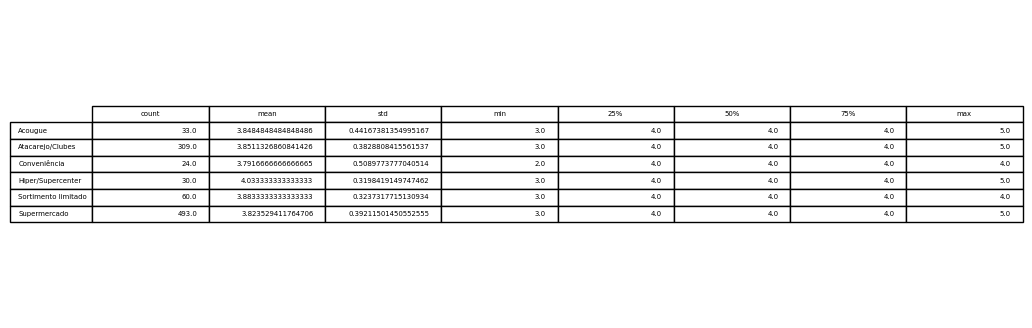

In [137]:
result = carne_bovina_data_clean.groupby('porte_loja')['est_desempenho_sanitario'].describe()

# Convertendo o DataFrame descritivo para uma figura
fig, ax = plt.subplots(figsize=(12, 4))  # Tamanho da figura ajustável conforme necessário
ax.axis('tight')
ax.axis('off')
ax.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')

plt.savefig('descricao_est_desempenho_sanitario.png', dpi=300)  # Salva a figura como PNG

plt.show()


In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'carne_bovina_data_clean' seja o seu DataFrame. 
# Este exemplo usará 'ct' como uma tabela de contagem cruzada já criada.

# Criando uma tabela de contagem cruzada (crosstab), se necessário
# ct = pd.crosstab(carne_bovina_data_clean['porte_loja'], carne_bovina_data_clean['est_desempenho_sanitario'], normalize='index')

# Criando o gráfico de barras empilhadas normalizadas
ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Distribuição Normalizada do Desempenho Sanitário por Porte de Loja', fontsize=16, fontweight='bold')
plt.xlabel('Porte do Varejista', fontsize=14)
plt.ylabel('Percentual', fontsize=14)
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
plt.yticks(fontsize=12)

# Melhorando a legenda
plt.legend(title='Escala de Desempenho Sanitário', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13')

# Adicionando uma linha de grade no eixo y para melhor leitura dos valores
plt.grid(False)

# Ajusta o layout para evitar o corte da legenda
plt.tight_layout()
plt.savefig('descritiva_hip2.png', dpi=300)
plt.show()



NameError: name 'ct' is not defined

In [143]:
#GLM

In [145]:
# Passo 1: Converta a variável categórica 'porte_loja' em variáveis dummy
carne_bovina_data_clean = pd.get_dummies(carne_bovina_data_clean, columns=['porte_loja'], drop_first=True)
dummy_columns = [col for col in carne_bovina_data_clean.columns if 'porte_loja_' in col]

In [147]:
# Passo 2: Prepare as variáveis 
independent_vars = dummy_columns + ['renda_setor']
X = carne_bovina_data_clean[independent_vars]
y = carne_bovina_data_clean['est_desempenho_sanitario']
X = sm.add_constant(X)
X = X.astype(int)

In [149]:
# Passo 3: Rode o modelo GLM
# Aqui, utilizamos a família Gaussian pois estamos lidando com uma variável resposta contínua
modelo_glm2 = sm.GLM(y, X, family=sm.families.Gaussian()).fit()
print(modelo_glm2.summary())

                    Generalized Linear Model Regression Results                     
Dep. Variable:     est_desempenho_sanitario   No. Observations:                  949
Model:                                  GLM   Df Residuals:                      942
Model Family:                      Gaussian   Df Model:                            6
Link Function:                     Identity   Scale:                         0.15066
Method:                                IRLS   Log-Likelihood:                -444.96
Date:                      Tue, 02 Jul 2024   Deviance:                       141.92
Time:                              15:28:40   Pearson chi2:                     142.
No. Iterations:                           3   Pseudo R-squ. (CS):            0.01174
Covariance Type:                  nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

In [151]:
#Verificar o pressuposto da normalidade dos resíduos
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Obter os resíduos
residuos2 = modelo_glm2.resid_response

# Testar a normalidade dos resíduos usando o teste de Shapiro-Wilk
statistic, p_value = stats.shapiro(residuos2)

print(f'Estatística de teste: {statistic}, P-valor: {p_value}')

# Interpretando o resultado
if p_value > 0.05:
    print("Os resíduos parecem vir de uma distribuição normalmente distribuída (não rejeita H0)")
else:
    print("Os resíduos não parecem vir de uma distribuição normalmente distribuída (rejeita H0)")

Estatística de teste: 0.5748751759529114, P-valor: 5.1287523794288305e-43
Os resíduos não parecem vir de uma distribuição normalmente distribuída (rejeita H0)


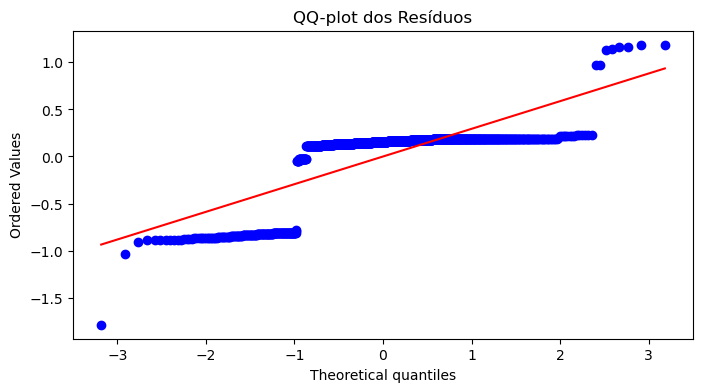

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



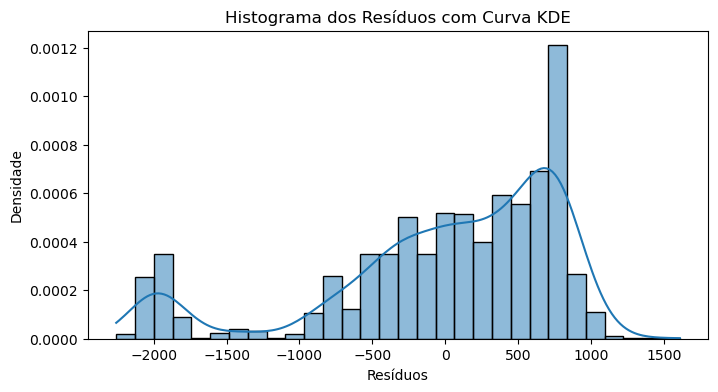

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ-plot dos resíduos
plt.figure(figsize=(8, 4))
stats.probplot(residuos2, dist="norm", plot=plt)
plt.title('QQ-plot dos Resíduos')
plt.savefig('residuos_hip2.png', dpi=300, bbox_inches='tight')
plt.show()

# Histograma dos resíduos com KDE (Kernel Density Estimate)
plt.figure(figsize=(8, 4))
sns.histplot(residuos, kde=True, bins=30, stat='density')
plt.title('Histograma dos Resíduos com Curva KDE')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.show()

In [154]:
y_transformed = np.log(y)
modelo_glm_transformado2 = sm.GLM(y_transformed, X, family=sm.families.Gaussian()).fit()
print(modelo_glm_transformado2.summary())

                    Generalized Linear Model Regression Results                     
Dep. Variable:     est_desempenho_sanitario   No. Observations:                  949
Model:                                  GLM   Df Residuals:                      942
Model Family:                      Gaussian   Df Model:                            6
Link Function:                     Identity   Scale:                        0.012294
Method:                                IRLS   Log-Likelihood:                 744.08
Date:                      Tue, 02 Jul 2024   Deviance:                       11.581
Time:                              15:28:42   Pearson chi2:                     11.6
No. Iterations:                           3   Pseudo R-squ. (CS):            0.01124
Covariance Type:                  nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

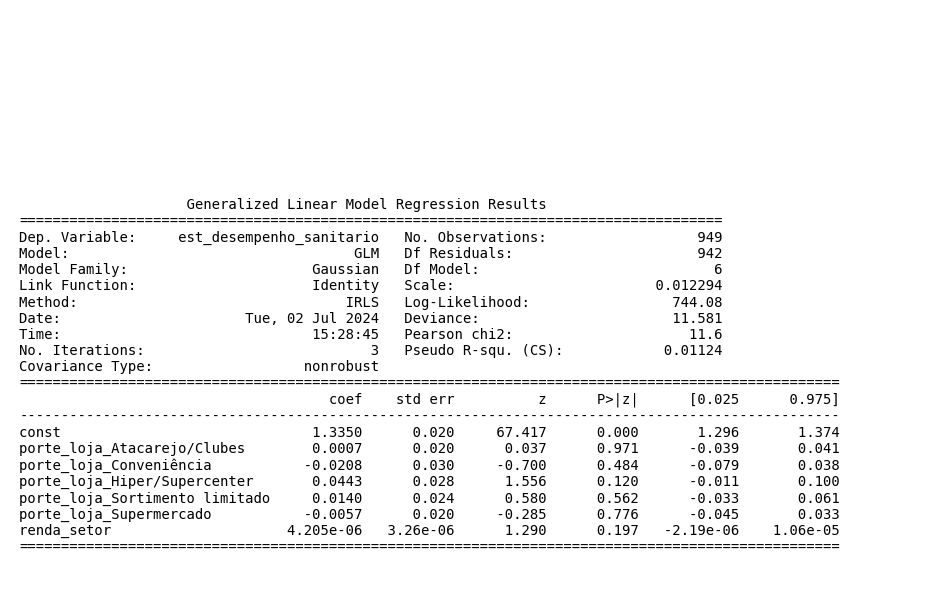

In [157]:
import matplotlib.pyplot as plt

# Primeiro, converta o resumo do modelo em uma string
summary_str2 = modelo_glm_transformado2.summary().as_text()

# Em seguida, use matplotlib para criar uma imagem de texto
plt.figure(figsize=(10, 6))  # Ajuste o tamanho conforme necessário
plt.text(0.01, 0.05, summary_str2, {'fontsize': 10}, fontname='Monospace')  # Ajuste a posição e o tamanho do texto conforme necessário
plt.axis('off')
plt.tight_layout()

# Salvar a imagem
plt.savefig('modelo_glm_transformado_summary2.png', dpi=300, bbox_inches='tight')

> Não há diferenças significativa no desempenho sanitário entre os diferentes portes de varejistas.

## Hipótese 3 - varejista de maior porte mais alimentos ultraprocessados
- VI - Porte do varejista, porte_loja
- VD - Nível de processamento, processamento
- Covariável - Renda setor censitário, renda_setor 

In [495]:
df = pd.read_csv('entrada/20240615_carnestotais_att.csv')

In [497]:
# Filtrar dados para observações com dados de processamento
processados = df[df['processamento'] != ' ']

In [499]:
df

ID         nome_da_loja  \
0     frango747                 3667   
1       boi1006  Açougue Pai e Filho   
2        boi865  Açougue Pai e Filho   
3        boi866  Açougue Pai e Filho   
4     frango987  Açougue Pai e Filho   
...         ...                  ...   
2331  frango956          Tela Quente   
2332   porco310          Tela Quente   
2333   porco311          Tela Quente   
2334   porco316          Tela Quente   
2335     boi799                Teste   

                                       endereco_da_loja loja_municipio  \
0     RUA GENERINA VALE,809, CENTRO - Rua Joel Damas...          Caico   
1             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
2             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
3             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
4             R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
...                                                 ...            ...   
2331  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2332  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2333  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2334  São Gonçalo do Amarante - Rio Grande do Norte,...    sao goncalo   
2335                                              Teste          Outro   

          lng_loja      lat_loja         carne nivel_de_inspecao  \
0       -35,202074     -5,836721        Frango               SIF   
1     -35,34827079  -5,850981514  Carne bovina            SEIPOA   
2     -35,34895744  -5,852689182  Carne bovina               SIF   
3     -3,534930076  -5,851664581  Carne bovina               SIF   
4     -35,34827079  -5,850981514        Frango            SEIPOA   
...            ...           ...           ...               ...   
2331  -35,27215547   -5,77344728        Frango               SIF   
2332  -35,27215547   -5,77344728         suina               SIF   
2333  -35,27215547   -5,77344728         suina               SIF   
2334  -35,27215547   -5,77344728         suina               SIE   
2335      4,619626     50,669363  Carne bovina               SIF   

     num_de_inspecao                        nome_do_frigo  \
0               3667              GUARAVES GUARABIRA AVES   
1               0165                                  NaN   
2                 76                                  JBS   
3               3921  NUTRIZA AGROINDUSTRIAL DE ALIMENTOS   
4               0042                                  NaN   
...              ...                                  ...   
2331             121                                  BRF   
2332            3515                                  BRF   
2333              77                      SEARA ALIMENTOS   
2334             166                                  NaN   
2335           Teste                                  NaN   

                                             frigo_tipo uf_frigo  \
0     AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB   
1                                                   NaN      NaN   
2     UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP   
3                          ABATEDOURO FRIGORIFICO - C15       GO   
4                                                   NaN      NaN   
...                                                 ...      ...   
2331  AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       MG   
2332  AA4 - AVES - ATE 600/H|ABATEDOURO FRIGORIFICO ...       MT   
2333  PC1 - PRODUTOS CARNEOS - MAIS DE 5.000 T/D|UNI...       RS   
2334                                                NaN      NaN   
2335                                                NaN      NaN   

         lng_frigo     lat_frigo  est_desempenho_sanitario  \
0     -35,48996498     -6,852715                       NaN   
1              NaN           NaN                       NaN   
2     -48,56737784  -20,55845552                       4.0   
3     -48,28029255  -17,3005

In [501]:
#Remover NANs
df_processamento = df.dropna(subset=['processamento'])
df_processamento

ID            nome_da_loja  \
0    frango747                    3667   
1      boi1006     Açougue Pai e Filho   
2       boi865     Açougue Pai e Filho   
3       boi866     Açougue Pai e Filho   
4    frango987     Açougue Pai e Filho   
..         ...                     ...   
866  frango726      Mercadinho Caseiro   
867   porco237      Mercadinho Caseiro   
881     boi570  Mercadinho Frei Damião   
882     boi571  Mercadinho Frei Damião   
883     boi572  Mercadinho Frei Damião   

                                      endereco_da_loja loja_municipio  \
0    RUA GENERINA VALE,809, CENTRO - Rua Joel Damas...          Caico   
1            R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
2            R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
3            R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
4            R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
..                                                 ...            ...   
866                              Rua Pedro Vasconcelos       Extremoz   
867                              Rua Pedro Vasconcelos       Extremoz   
881  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   
882  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   
883  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   

         lng_loja      lat_loja         carne nivel_de_inspecao  \
0      -35,202074     -5,836721        Frango               SIF   
1    -35,34827079  -5,850981514  Carne bovina            SEIPOA   
2    -35,34895744  -5,852689182  Carne bovina               SIF   
3    -3,534930076  -5,851664581  Carne bovina               SIF   
4    -35,34827079  -5,850981514        Frango            SEIPOA   
..            ...           ...           ...               ...   
866    -35,289503     -5,687564        Frango               SIF   
867    -35,289475     -5,687564         suina               SIF   
881      -37,1088       -6,4666  Carne bovina               SIF   
882      -37,1088       -6,4666  Carne bovina               SIF   
883      -37,1088       -6,4666  Carne bovina               SIF   

    num_de_inspecao                               nome_do_frigo  \
0              3667                     GUARAVES GUARABIRA AVES   
1              0165                                         NaN   
2                76                                         JBS   
3              3921         NUTRIZA AGROINDUSTRIAL DE ALIMENTOS   
4              0042                                         NaN   
..              ...                                         ...   
866            3667                     GUARAVES GUARABIRA AVES   
867              76                                         JBS   
881            2532                             SEARA ALIMENTOS   
882            1513  BOVMEAT PROCESSADORA DE CARNES E DERIVADOS   
883             968                             SEARA ALIMENTOS   

                                            frigo_tipo uf_frigo     lng_frigo  \
0    AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB  -35,48996498   
1                                                  NaN      NaN           NaN   
2    UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -48,56737784   
3                         ABATEDOURO FRIGORIFICO - C15       GO  -48,28029255   
4                                                  NaN      NaN           NaN   
..                                                 ...      ...           ...   
866  AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB  -35,48996498   
867  PC1 - PRODUTOS CARNEOS - MAIS DE 5.000 T/D|UNI...       SP  -48,56737784   
881  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -46,78881014   
882  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -46,82124801   
883  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SC  -51,40520808   

        lat_frigo  est_desempenho_sanitario  \


In [503]:
#Remover NANs
colunas_verificar = ['porte_loja', 'renda_setor', 'processamento']
df_processamento = df_processamento.dropna(subset=colunas_verificar)
df_processamento

ID              nome_da_loja  \
0    frango747                      3667   
2       boi865       Açougue Pai e Filho   
5         boi3  Ary Coiffure - Carrefour   
6         boi4  Ary Coiffure - Carrefour   
7         boi5  Ary Coiffure - Carrefour   
..         ...                       ...   
866  frango726        Mercadinho Caseiro   
867   porco237        Mercadinho Caseiro   
881     boi570    Mercadinho Frei Damião   
882     boi571    Mercadinho Frei Damião   
883     boi572    Mercadinho Frei Damião   

                                      endereco_da_loja loja_municipio  \
0    RUA GENERINA VALE,809, CENTRO - Rua Joel Damas...          Caico   
2            R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
5    CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
6    CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
7    CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
..                                                 ...            ...   
866                              Rua Pedro Vasconcelos       Extremoz   
867                              Rua Pedro Vasconcelos       Extremoz   
881  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   
882  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   
883  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   

         lng_loja      lat_loja         carne nivel_de_inspecao  \
0      -35,202074     -5,836721        Frango               SIF   
2    -35,34895744  -5,852689182  Carne bovina               SIF   
5        -35,2099       -5,8455  Carne bovina               SIF   
6        -35,2099       -5,8455  Carne bovina               SIF   
7        -35,2099       -5,8455  Carne bovina               SIF   
..            ...           ...           ...               ...   
866    -35,289503     -5,687564        Frango               SIF   
867    -35,289475     -5,687564         suina               SIF   
881      -37,1088       -6,4666  Carne bovina               SIF   
882      -37,1088       -6,4666  Carne bovina               SIF   
883      -37,1088       -6,4666  Carne bovina               SIF   

    num_de_inspecao                               nome_do_frigo  \
0              3667                     GUARAVES GUARABIRA AVES   
2                76                                         JBS   
5               791                                     MINERVA   
6               860                                   MASTERBOI   
7               860                                   MASTERBOI   
..              ...                                         ...   
866            3667                     GUARAVES GUARABIRA AVES   
867              76                                         JBS   
881            2532                             SEARA ALIMENTOS   
882            1513  BOVMEAT PROCESSADORA DE CARNES E DERIVADOS   
883             968                             SEARA ALIMENTOS   

                                            frigo_tipo uf_frigo     lng_frigo  \
0    AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB  -35,48996498   
2    UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -48,56737784   
5    ABATEDOURO FRIGORIFICO - C15, AB1 - BOVINO - M...       RO   -61,8057425   
6    ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO  -48,42480679   
7    ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO  -48,42480679   
..                                                 ...      ...           ...   
866  AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB  -35,48996498   
867  PC1 - PRODUTOS CARNEOS - MAIS DE 5.000 T/D|UNI...       SP  -48,56737784   
881  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -46,78881014   
882  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -46,82124801   
883  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SC  -51,40520808   

        lat_frigo  est_

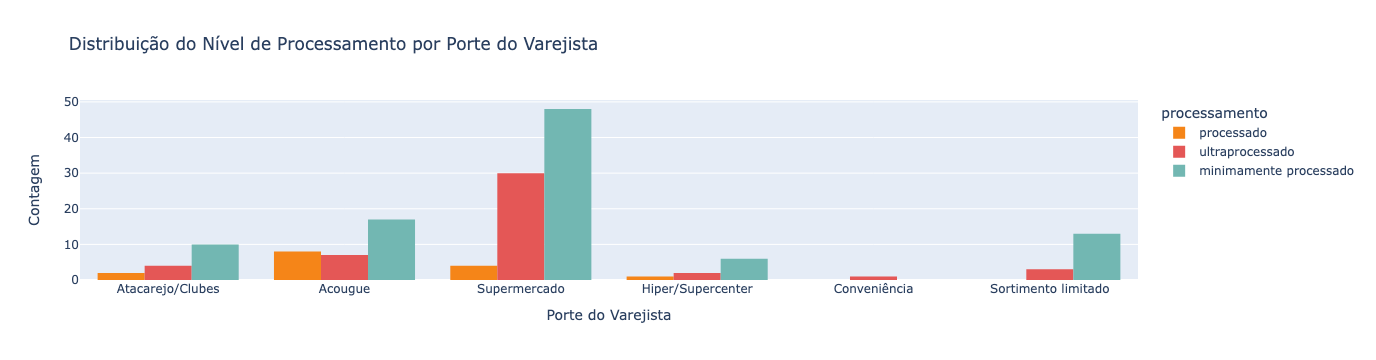

In [505]:
# Verificar a distribuição do nível de processamento por porte do varejista
import plotly.express as px

fig = px.histogram(df_processamento, x='porte_loja', color='processamento',
                   barmode='group',
                   title='Distribuição do Nível de Processamento por Porte do Varejista',
                   labels={'porte_loja': 'Porte do Varejista', 'count': 'Contagem'},
                   category_orders={"processamento": ["minimamente processado", "processado", "ultraprocessado"]},
                   color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(xaxis_title='Porte do Varejista', yaxis_title='Contagem')
fig.show()

In [507]:
import kaleido


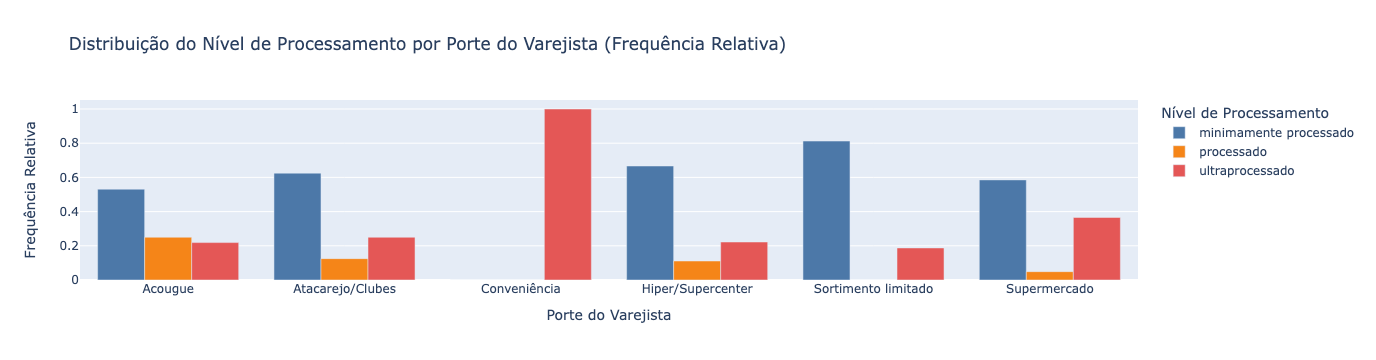

In [509]:
# Calcular a frequência relativa para cada nível de processamento por porte do varejista
processing_distribution = df_processamento.groupby('porte_loja')['processamento'].value_counts(normalize=True).unstack().fillna(0)

# Redefinir os índices para que os dados estejam no formato adequado para o plot
processing_distribution = processing_distribution.stack().reset_index(name='frequencia_relativa')

# Plotar a distribuição do nível de processamento por porte do varejista com frequência relativa
fig = px.bar(processing_distribution, x='porte_loja', y='frequencia_relativa', color='processamento',
             title='Distribuição do Nível de Processamento por Porte do Varejista (Frequência Relativa)',
             labels={'porte_loja': 'Porte do Varejista', 'frequencia_relativa': 'Frequência Relativa', 'processamento': 'Nível de Processamento'},
             barmode='group',
             color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(xaxis_title='Porte do Varejista', yaxis_title='Frequência Relativa')
fig.write_image('Descritiva3.png', scale=5)
fig.show()

> - Açougue: A maioria dos produtos são minimamente processados, com uma menor proporção de produtos processados e ultraprocessados.
> 
> - Atacarejo/Clubes: Predominância de produtos minimamente processados, com poucas opções processadas e ultraprocessadas.
> 
> - Conveniência: Todos os produtos são ultraprocessados.
> 
> - Hiper/Supercenter: A maioria dos produtos são minimamente processados, com algumas opções ultraprocessadas.
> 
> - Sortimento Limitado: Principalmente produtos minimamente processados, com uma pequena proporção de produtos ultraprocessados.
> 
> - Supermercado: Uma distribuição mais equilibrada entre produtos minimamente processados e ultraprocessados, com poucos produtos processados.

### Próximos Passos:
- Análise de Proporções: Verificar se há diferenças significativas na proporção de alimentos ultraprocessados entre diferentes portes de varejistas.
- Regressão Logística: Considerar a renda do setor censitário como uma covariável e ajustar um modelo de regressão logística para verificar a interação entre porte do varejista e nível de processamento.

In [513]:
# Tabela de contingência para porte_loja e processamento
contingency_table = pd.crosstab(df_processamento['porte_loja'], df_processamento['processamento'])
contingency_table


processamento        minimamente processado   processado  ultraprocessado
porte_loja                                                               
Acougue                                   17           8                7
Atacarejo/Clubes                          10           2                4
Conveniência                               0           0                1
Hiper/Supercenter                          6           1                2
Sortimento limitado                       13           0                3
Supermercado                              48           4               30

In [515]:
#Ajustes na variável renda
df_processamento['renda_setor'] = df_processamento['renda_setor'].astype('str')
df_processamento['renda_setor'] = df_processamento['renda_setor'].str.replace(',', '.').astype(float)

/var/folders/bp/64w2_y254b14x57_vbv1x62r0000gn/T/ipykernel_77352/1018207596.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bp/64w2_y254b14x57_vbv1x62r0000gn/T/ipykernel_77352/1018207596.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [517]:
df_processamento

ID              nome_da_loja  \
0    frango747                      3667   
2       boi865       Açougue Pai e Filho   
5         boi3  Ary Coiffure - Carrefour   
6         boi4  Ary Coiffure - Carrefour   
7         boi5  Ary Coiffure - Carrefour   
..         ...                       ...   
866  frango726        Mercadinho Caseiro   
867   porco237        Mercadinho Caseiro   
881     boi570    Mercadinho Frei Damião   
882     boi571    Mercadinho Frei Damião   
883     boi572    Mercadinho Frei Damião   

                                      endereco_da_loja loja_municipio  \
0    RUA GENERINA VALE,809, CENTRO - Rua Joel Damas...          Caico   
2            R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
5    CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
6    CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
7    CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
..                                                 ...            ...   
866                              Rua Pedro Vasconcelos       Extremoz   
867                              Rua Pedro Vasconcelos       Extremoz   
881  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   
882  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   
883  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   

         lng_loja      lat_loja         carne nivel_de_inspecao  \
0      -35,202074     -5,836721        Frango               SIF   
2    -35,34895744  -5,852689182  Carne bovina               SIF   
5        -35,2099       -5,8455  Carne bovina               SIF   
6        -35,2099       -5,8455  Carne bovina               SIF   
7        -35,2099       -5,8455  Carne bovina               SIF   
..            ...           ...           ...               ...   
866    -35,289503     -5,687564        Frango               SIF   
867    -35,289475     -5,687564         suina               SIF   
881      -37,1088       -6,4666  Carne bovina               SIF   
882      -37,1088       -6,4666  Carne bovina               SIF   
883      -37,1088       -6,4666  Carne bovina               SIF   

    num_de_inspecao                               nome_do_frigo  \
0              3667                     GUARAVES GUARABIRA AVES   
2                76                                         JBS   
5               791                                     MINERVA   
6               860                                   MASTERBOI   
7               860                                   MASTERBOI   
..              ...                                         ...   
866            3667                     GUARAVES GUARABIRA AVES   
867              76                                         JBS   
881            2532                             SEARA ALIMENTOS   
882            1513  BOVMEAT PROCESSADORA DE CARNES E DERIVADOS   
883             968                             SEARA ALIMENTOS   

                                            frigo_tipo uf_frigo     lng_frigo  \
0    AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB  -35,48996498   
2    UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -48,56737784   
5    ABATEDOURO FRIGORIFICO - C15, AB1 - BOVINO - M...       RO   -61,8057425   
6    ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO  -48,42480679   
7    ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO  -48,42480679   
..                                                 ...      ...           ...   
866  AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB  -35,48996498   
867  PC1 - PRODUTOS CARNEOS - MAIS DE 5.000 T/D|UNI...       SP  -48,56737784   
881  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -46,78881014   
882  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -46,82124801   
883  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SC  -51,40520808   

        lat_frigo  est_

In [567]:
# Convertendo 'porte_loja' em variáveis dummy
dummy_columns = [col for col in df_processamento.columns if 'porte_loja_' in col]
independent_vars = dummy_columns + ['renda_setor']
X = df_processamento[independent_vars]

In [569]:
#Constante
X = sm.add_constant(X)

In [571]:
y = df_processamento['processamento']

In [573]:
df_processamento

ID              nome_da_loja  \
0    frango747                      3667   
2       boi865       Açougue Pai e Filho   
5         boi3  Ary Coiffure - Carrefour   
6         boi4  Ary Coiffure - Carrefour   
7         boi5  Ary Coiffure - Carrefour   
..         ...                       ...   
866  frango726        Mercadinho Caseiro   
867   porco237        Mercadinho Caseiro   
881     boi570    Mercadinho Frei Damião   
882     boi571    Mercadinho Frei Damião   
883     boi572    Mercadinho Frei Damião   

                                      endereco_da_loja loja_municipio  \
0    RUA GENERINA VALE,809, CENTRO - Rua Joel Damas...          Caico   
2            R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
5    CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
6    CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
7    CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
..                                                 ...            ...   
866                              Rua Pedro Vasconcelos       Extremoz   
867                              Rua Pedro Vasconcelos       Extremoz   
881  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   
882  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   
883  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   

         lng_loja      lat_loja         carne nivel_de_inspecao  \
0      -35,202074     -5,836721        Frango               SIF   
2    -35,34895744  -5,852689182  Carne bovina               SIF   
5        -35,2099       -5,8455  Carne bovina               SIF   
6        -35,2099       -5,8455  Carne bovina               SIF   
7        -35,2099       -5,8455  Carne bovina               SIF   
..            ...           ...           ...               ...   
866    -35,289503     -5,687564        Frango               SIF   
867    -35,289475     -5,687564         suina               SIF   
881      -37,1088       -6,4666  Carne bovina               SIF   
882      -37,1088       -6,4666  Carne bovina               SIF   
883      -37,1088       -6,4666  Carne bovina               SIF   

    num_de_inspecao                               nome_do_frigo  \
0              3667                     GUARAVES GUARABIRA AVES   
2                76                                         JBS   
5               791                                     MINERVA   
6               860                                   MASTERBOI   
7               860                                   MASTERBOI   
..              ...                                         ...   
866            3667                     GUARAVES GUARABIRA AVES   
867              76                                         JBS   
881            2532                             SEARA ALIMENTOS   
882            1513  BOVMEAT PROCESSADORA DE CARNES E DERIVADOS   
883             968                             SEARA ALIMENTOS   

                                            frigo_tipo uf_frigo     lng_frigo  \
0    AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB  -35,48996498   
2    UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -48,56737784   
5    ABATEDOURO FRIGORIFICO - C15, AB1 - BOVINO - M...       RO   -61,8057425   
6    ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO  -48,42480679   
7    ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO  -48,42480679   
..                                                 ...      ...           ...   
866  AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB  -35,48996498   
867  PC1 - PRODUTOS CARNEOS - MAIS DE 5.000 T/D|UNI...       SP  -48,56737784   
881  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -46,78881014   
882  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -46,82124801   
883  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SC  -51,40520808   

        lat_frigo  est_

In [575]:
# Certifique-se de que 'processamento' é uma variável categórica
df_processamento['processamento'] = pd.Categorical(df_processamento['processamento'])

/var/folders/bp/64w2_y254b14x57_vbv1x62r0000gn/T/ipykernel_77352/3463836299.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [577]:
valores_unicos = df_processamento['processamento'].unique()
print(valores_unicos)

['ultraprocessado', 'minimamente processado ', 'processado']
Categories (3, object): ['minimamente processado ', 'processado', 'ultraprocessado']


In [579]:
df_processamento

ID              nome_da_loja  \
0    frango747                      3667   
2       boi865       Açougue Pai e Filho   
5         boi3  Ary Coiffure - Carrefour   
6         boi4  Ary Coiffure - Carrefour   
7         boi5  Ary Coiffure - Carrefour   
..         ...                       ...   
866  frango726        Mercadinho Caseiro   
867   porco237        Mercadinho Caseiro   
881     boi570    Mercadinho Frei Damião   
882     boi571    Mercadinho Frei Damião   
883     boi572    Mercadinho Frei Damião   

                                      endereco_da_loja loja_municipio  \
0    RUA GENERINA VALE,809, CENTRO - Rua Joel Damas...          Caico   
2            R. São Sebastião, Macaíba - RN, 59280-000        Macaiba   
5    CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
6    CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
7    CARREFOUR - AV. SEN. SALGADO FILHO, 3700 - LOJ...          Natal   
..                                                 ...            ...   
866                              Rua Pedro Vasconcelos       Extremoz   
867                              Rua Pedro Vasconcelos       Extremoz   
881  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   
882  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   
883  R. JOSÉ ADÉLINO DE MEDEIROS, 110 - PAULO VI, C...          Caico   

         lng_loja      lat_loja         carne nivel_de_inspecao  \
0      -35,202074     -5,836721        Frango               SIF   
2    -35,34895744  -5,852689182  Carne bovina               SIF   
5        -35,2099       -5,8455  Carne bovina               SIF   
6        -35,2099       -5,8455  Carne bovina               SIF   
7        -35,2099       -5,8455  Carne bovina               SIF   
..            ...           ...           ...               ...   
866    -35,289503     -5,687564        Frango               SIF   
867    -35,289475     -5,687564         suina               SIF   
881      -37,1088       -6,4666  Carne bovina               SIF   
882      -37,1088       -6,4666  Carne bovina               SIF   
883      -37,1088       -6,4666  Carne bovina               SIF   

    num_de_inspecao                               nome_do_frigo  \
0              3667                     GUARAVES GUARABIRA AVES   
2                76                                         JBS   
5               791                                     MINERVA   
6               860                                   MASTERBOI   
7               860                                   MASTERBOI   
..              ...                                         ...   
866            3667                     GUARAVES GUARABIRA AVES   
867              76                                         JBS   
881            2532                             SEARA ALIMENTOS   
882            1513  BOVMEAT PROCESSADORA DE CARNES E DERIVADOS   
883             968                             SEARA ALIMENTOS   

                                            frigo_tipo uf_frigo     lng_frigo  \
0    AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB  -35,48996498   
2    UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -48,56737784   
5    ABATEDOURO FRIGORIFICO - C15, AB1 - BOVINO - M...       RO   -61,8057425   
6    ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO  -48,42480679   
7    ABATEDOURO FRIGORIFICO - C15, AB3 - BOVINO - 4...       TO  -48,42480679   
..                                                 ...      ...           ...   
866  AA1 - AVES - MAIS DE 3000/H|ABATEDOURO FRIGORI...       PB  -35,48996498   
867  PC1 - PRODUTOS CARNEOS - MAIS DE 5.000 T/D|UNI...       SP  -48,56737784   
881  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -46,78881014   
882  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SP  -46,82124801   
883  UNIDADE DE BENEF. DE CARNE E PROD. CARNEOS - C...       SC  -51,40520808   

        lat_frigo  est_

In [565]:
from statsmodels.formula.api import mnlogit

# Ajustando o modelo
modelo = sm.MNLogit(y, X).fit()

# Exibindo o resumo do modelo
print(modelo.summary())


Optimization terminated successfully.
         Current function value: 0.891860
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:          processamento   No. Observations:                  156
Model:                        MNLogit   Df Residuals:                      154
Method:                           MLE   Df Model:                            0
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:               7.377e-11
Time:                        16:42:06   Log-Likelihood:                -139.13
converged:                       True   LL-Null:                       -139.13
Covariance Type:            nonrobust   LLR p-value:                       nan
     processamento=processado       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.8352      0.278     -6.601      0.

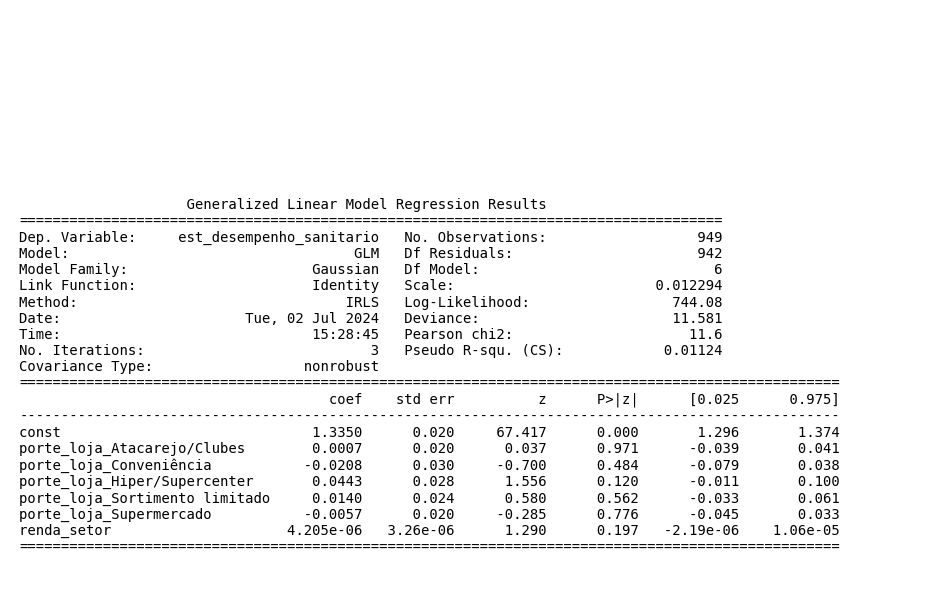

In [581]:
import matplotlib.pyplot as plt

# Primeiro, converta o resumo do modelo em uma string
summary_mnlogit = modelo.summary().as_text()

# Em seguida, use matplotlib para criar uma imagem de texto
plt.figure(figsize=(10, 6))  # Ajuste o tamanho conforme necessário
plt.text(0.01, 0.05, summary_str2, {'fontsize': 10}, fontname='Monospace')  # Ajuste a posição e o tamanho do texto conforme necessário
plt.axis('off')
plt.tight_layout()

# Salvar a imagem
plt.savefig('summary_mnlogit.png', dpi=300, bbox_inches='tight')

> - Atacarejo/Clubes: O coeficiente (-2.6601) é significativo e negativo, indicando que, comparado ao grupo de referência (provavelmente "Açougue"), "Atacarejo/Clubes" tem uma probabilidade significativamente menor de vender alimentos ultraprocessados.
>
> - Conveniência: O coeficiente (-1.7229) não é estatisticamente significativo (p = 0.112), indicando que a diferença não é significativa.
>
> - Hiper/Supercenter: O coeficiente (-0.4523) não é estatisticamente significativo (p = 0.587), indicando que a diferença não é significativa.
>
> - Sortimento Limitado: O coeficiente (-1.4687) é significativo (p = 0.038) e negativo, indicando que "Sortimento Limitado" tem uma probabilidade significativamente menor de vender alimentos ultraprocessados.
>
> - Supermercado: O coeficiente (-1.2190) é significativo (p = 0.006) e negativo, indicando que "Supermercado" tem uma probabilidade significativamente menor de vender alimentos ultraprocessados.
>
> - Renda do Setor Censitário: O coeficiente (0.0001) não é estatisticamente significativo (p = 0.346), indicando que a renda do setor não tem uma associação significativa com a probabilidade de um alimento ser ultraprocessado.